# Приоритизация гипотез, A/B-тест

Цель проекта - приоритизировать гипотезы, запустить A/B-тест и проанализировать его результаты 

Данные о гипотезах хранятся в файле `hypothesis.csv`:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале;

Данные о заказах хранятся в файле `orders.csv`:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Данные о посетителях хранятся в файле `visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Приоритизация гипотез

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
pd.options.display.max_colwidth = 120
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
pd.options.display.max_colwidth = 120
hypothesis.sort_values(by='ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее перспективными гипотезами по ICE являются 9,1,8

In [4]:
hypothesis['RICE'] = round(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
pd.options.display.max_colwidth = 120
hypothesis.sort_values(by='RICE',ascending=False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [46]:
hypothesis['ICE_rank'] = hypothesis['ICE'].rank()
hypothesis['RICE_rank'] = hypothesis['RICE'].rank()
hypothesis.sort_values(by=['RICE_rank','ICE_rank'],ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE,ICE_rank,RICE_rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0,7.0,9.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0,5.0,8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0,8.0,6.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0,6.0,6.5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2,9.0,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0,2.0,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0,4.0,2.5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0,3.0,2.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0,1.0,1.0


Наиболее перспективными гипотезами по RICE являются 8,3 и 1 гипотезы. Гипотеза под номером 9 переместилась на 5 место,так как параметр Reach(охват) у нее равен всего 1. В то же время гипотеза 8 `(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)` вырвалась на первое место, ввиду высоко оцененного параментра Reach - 10. Наименее перспективной гипотезой как по ICE, так и по RICE является гипотеза под номером 5. 

## A/B-тест

### Графики кумулятивных метрих

In [6]:
orders = pd.read_csv('visitors.csv')
visitors = pd.read_csv('orders.csv')


In [7]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# изменим тип данных в столбце date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

Полные дубликаты в данных отсутствуют

In [12]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Всего в тесте две группы: А и В

In [13]:
print('Дата начала теста {}'.format(orders['date'].min()))
print('Дата окончания теста {}'.format(orders['date'].max()))

Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00


In [14]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


В группе А 503 пользователей, а в группе В - 586 пользователей

In [15]:
orders['transactionId'].duplicated().sum()

0

Дубликаты по идентификатору заказа также отсутствуют. Проверим не попал ли пользователь в обе группы 

In [16]:
visitorsInTwoGroups = orders[(orders['visitorId'].duplicated() == True) & (orders[['visitorId','group']]
                                                     .duplicated() == False)]['visitorId']
len(visitorsInTwoGroups)

58

In [17]:
orders[orders['visitorId'].isin(visitorsInTwoGroups) == True].sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


Существуют пользователи, которые попали сразу и в группу А и в группу В, их 58 человек. Стоит убрать их из анализа, так как скорее всего это ошибка при составлении данных. 

In [18]:
orders = orders[orders['visitorId'].isin(visitorsInTwoGroups) == False]


In [19]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,445
B,528


После удаления пользователей, попавших сразу в обе группы, число пользователей в группе А - 445 человек, а группе В - 528 человек. 

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [21]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'],
                       orders['group'] == x['group'])
    ].agg({'date':'max','group':'max','transactionId':'nunique','visitorId':'nunique','revenue':'sum'}), axis=1
                                   ).sort_values(by=['date','group'])

In [22]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
   lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'],
                       visitors['group'] == x['group'])
    ].agg({'date':'max','group':'max','visitors':'sum'}), axis=1
                                   ).sort_values(by=['date','group'])


In [23]:
#объединим кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, on = ['date','group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]

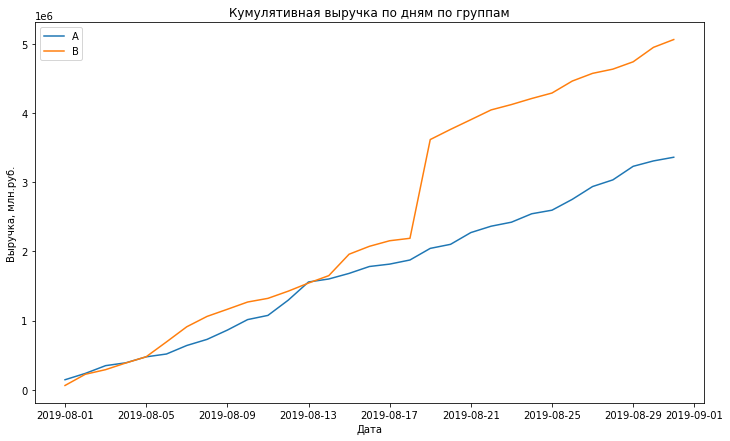

In [25]:
#построим график кумулятивной выручкой по дням по группам
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label = 'B')
plt.title('Кумулятивная выручка по дням по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка, млн.руб.')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

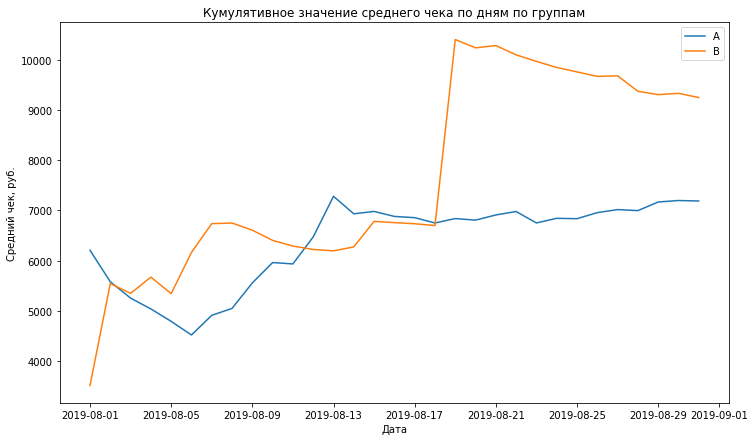

In [26]:
#построим график кумулятивного среднего чека по дням по группам
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'],(cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']), label = 'A')
plt.plot(cumulativeRevenueB['date'],(cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']), label = 'B')
plt.title('Кумулятивное значение среднего чека по дням по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.show()

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Также заметен сильный скачок в группе В. Скорее всего принимать решение не по стабилизирующемуся графику еще рано, кроме того можно говорить и наличии выбросах, которые могут исказить данную метрику. 

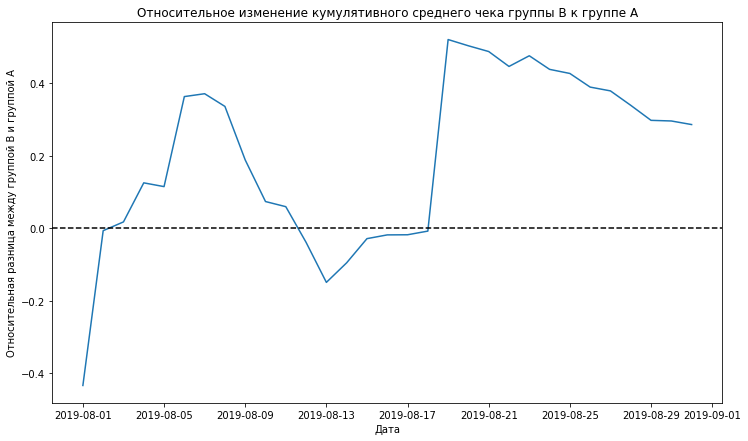

In [27]:
#объединим кумулятивные данные по группа в одну переменную для нахождения относительного изменения
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on= 'date',suffixes=['A','B'])

#построим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeRevenue['date'],((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0,color='black',linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительная разница между группой В и группой А')
plt.show()


В нескольких точках график различия между сегментами резко «скачет», соответственно можно сказать что в данных явно наблюдаются выбросы. Стоит отметить, что почти на всем промежутке значение в группе В выше, чем в А.

In [28]:
#считаем кумулятивную среднего количества заказов на посетителя и отделяем данные для каждой группы
cumulativeData['avg_orders_by_visitor'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

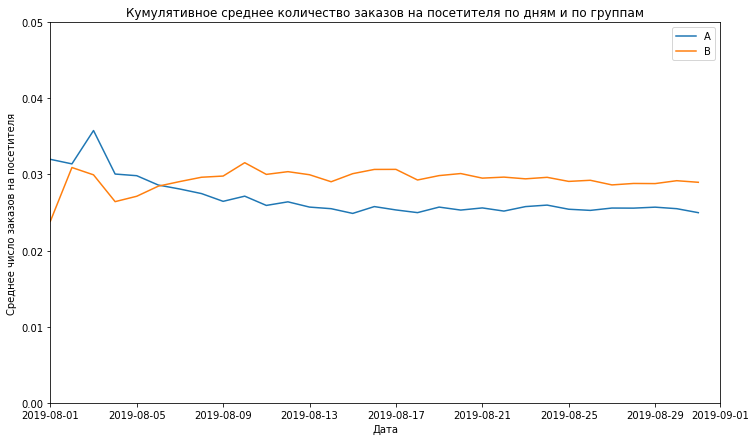

In [29]:
#построим график кумулятивное среднее количество заказов на посетителя по дням и группам
plt.figure(figsize=(12, 7))
plt.plot(cumulativeDataA['date'],cumulativeDataA['avg_orders_by_visitor'], label = 'A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['avg_orders_by_visitor'], label = 'B')
plt.title('Кумулятивное среднее количество заказов на посетителя по дням и по группам')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) 
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на посетителя')
plt.show()

Вначале группы колебались около одного значения, но затем среднее число заказов на посетителя группы В вырвалось вперёд и зафиксировалось, а среднее число заказов на посетителя группы А просело и также зафиксировалась.

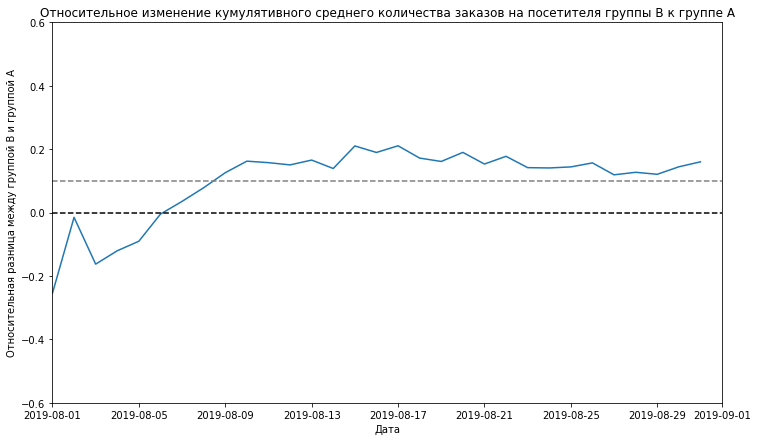

In [30]:
#объединим кумулятивные данные по группа в одну переменную для нахождения относительного изменения
mergedCumulativeConversions = cumulativeDataA.merge(cumulativeDataB, on='date',suffixes=['A','B'])

#построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'],(mergedCumulativeConversions['avg_orders_by_visitorB']/
                                              mergedCumulativeConversions['avg_orders_by_visitorA']-1))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0,color='black',linestyle='--')
plt.axhline(y=0.1,color='grey',linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.6, 0.6])
plt.xlabel('Дата')
plt.ylabel('Относительная разница между группой В и группой А')
plt.show()


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Однако в последствии мы видим снижение относительной разницы между группами, и конце значение зафиксировалось около среднего

### Анализ выбросов, расчет перцентилей

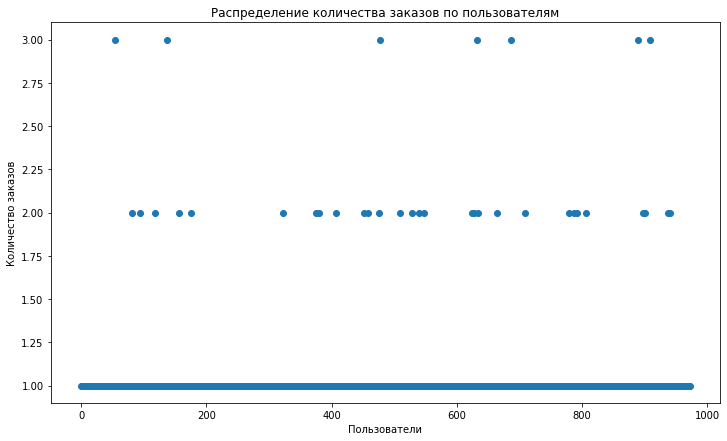

In [31]:
# найдем количество заказов на одного пользователя
ordersByUsers = orders.groupby('visitorId',as_index=False).agg({'transactionId':'nunique','group':'max'})
ordersByUsers.columns = ['visitorId','orders','group']

#построем диаграмму рассеяния для количества заказов по пользователям
plt.figure(figsize=(12, 7))
plt.scatter(pd.Series(range(0,len(ordersByUsers))),ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

Из диаграммы видно, что в основном пользователи заказывали 1 раз, однако доля заказов от 2 до 3 также значительна. Кроме того, видны выбросы - пользователей, которые совершили 8-11 заказов. 

In [32]:
#посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [95, 99])


array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказа. И всего 1% пользователей заказывали более двух раз. Для границы аномальных значений можно выбрать 1, таким образом в выборку войдет около 95% пользователей. 

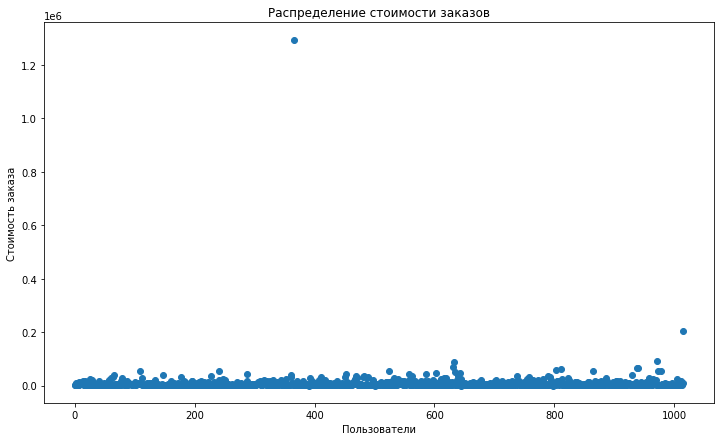

In [33]:
#построем диаграмму рассеяния для стоимости заказов
plt.figure(figsize=(12, 7))
plt.scatter(pd.Series(range(0,len(orders))),orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

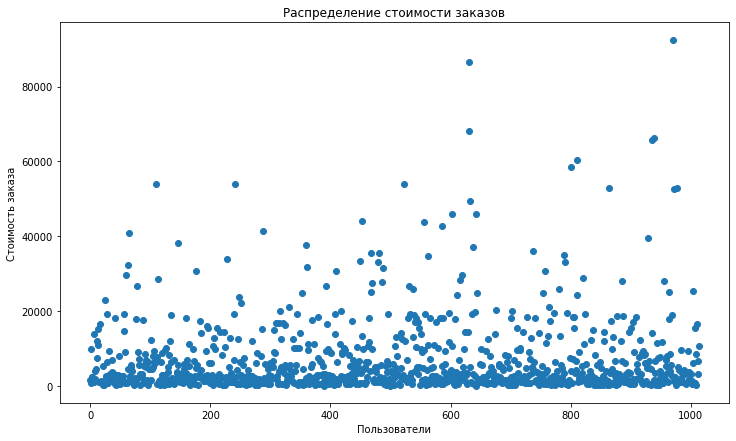

In [34]:
#построем диаграмму рассеяния для стоимости заказов без явного выброса
plt.figure(figsize=(12, 7))
plt.scatter(pd.Series(range(0,len(orders[orders['revenue'] < 200000]))),orders[orders['revenue'] < 200000]['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

Основная доля заказов находится не превышает 20 тыс. руб. Как и предполагалось, есть два заказа, который явно дороже всех остальных.

In [35]:
#посчитаем 95-й и 99-й перцентили стоимости заказа
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Соотвественно для определения границы для аномальных значений можно установить заказы свыше 26 785 рублей, так мы отсеем 5% пользователь с дорогими заказами. 

### Определение статистической значимости различий между группами

#### По "сырым" данным

In [36]:
#разделим количество заказов по пользователям на группы
ordersByUsersA = ordersByUsers[ordersByUsers['group'] == 'A'][['visitorId','orders']]
ordersByUsersB = ordersByUsers[ordersByUsers['group'] == 'B'][['visitorId','orders']]

Проверим существуют ли различия в среднем количестве заказов на посетителя между группами

**Нулевая гипотеза:** раличия в среднем количестве заказов на посетителя между группами отсутствуют

**Альтернативная гипотеза:** раличия в среднем количестве заказов на посетителя между группами есть

In [37]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(
    0,index=np.arange(
        visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA['orders']))
    , name ='orders')
                    ],axis=0
                   )

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(
    0,index=np.arange(
        visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB['orders']))
    , name ='orders')
                    ],axis=0
                   )

In [38]:
#выведем статистическую значимость различий в среднем количестве заказов на посетителя между группами  
print(stats.mannwhitneyu(sampleA, sampleB)[1])
#выведем относительную разницу между среднем количестве заказов на посетителя между группами  
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.011018084110014696
0.160


p-value меньше 0,05, соответственно нулевую гипотезу, гласящую, что раличий в среднем количестве заказов на посетителя между группами нет, отвергаем. Различия есть. Относительный выиграш группы В составляет 16%

Проверим существуют ли различия в среднем чеке между группами

**Нулевая гипотеза:** раличия в среднем чеке между группами отсутствуют

**Альтернативная гипотеза:** раличия в среднем чеке между группами есть

In [39]:
#проведем тест Манна-Уитни
results = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],orders[orders['group'] == 'B']['revenue'])
#выведем статистическую значимость различий в среднем чеке заказа между группами  
print(results[1])
#выведем статистическую значимость различий в среднем чеке заказа между группами  
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))


0.8294908998149533
0.287


p-value = 0,83, что выше 0,05, соответственно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы В значительно выше, среднего чека группы А (на 28,7%). Однако стоит помнить о выбросах и посмотреть на ситуацию, после их удаления. 

#### По "очищенным" данным

In [40]:
#найдем пользователей с аномальными стоимостью и количеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0])]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0])]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], [95, 99])[0])]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
)

abnormalUsers

82       366673373
138      611059232
157      678354126
176      759473111
375     1617417821
           ...    
1103    1164614297
1121    1604853044
1136    1307669133
1142    2606908679
1196    2108080724
Name: visitorId, Length: 86, dtype: int64

Всего таких пользователей 86 человек.

In [41]:
#отфильтровав данных от аномальных пользователей, 
#объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



In [42]:
print(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01593020716573973
0.174


P-value увеличился, но разница между сегментами немного увеличилась с 16% до 17%. При этом, р-value все равно ниже 0,05, соответство, есть причины отвергнуть нулевую гипотезу. 

In [43]:
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )



In [44]:
print(results[1])

print("{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
 

0.7271286894009963
-0.034


p-value сократился с 0,83 до 0,72, что все равно выше 0,05, соответственно, нулевая гипотеза не отвергается. При этом если до фильтрации выбросов средний чек группы В значительно превышал средний чек группы А, то после удаления аномальных пользователей средний чек группы В становится чуть ниже среднего чека А (на 3%). 


## Выводы

- Есть статистически значимое различие по среднему количеству заказов  на посетителя между группами как по сырым данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов  на посетителя между группами говорит о том, что результаты группы B лучше группы A: результаты зафиксировались около среднего значения.
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя из-за наличия выбросов.

Таким образом, исходя из фактов выше, тест стоит остановить, зафиксировать победу группы В. 